E-Commerce Dataset (https://www.kaggle.com/datasets/carrie1/ecommerce-data?select=data.csv)

To Do :

- Load the data
- Explore the data
- Clean the data

EDA :

- Calculate basic statistics for sales, such as total revenue, average sales per month, etc.
- Visualize sales trends
- Identify top selling products

Customer Segmentation :

- Identify the most popular customers

Product Analysis :

- Identify the most popular products
- Identify the sales of different priced items

Recommendations :

- Provide recommendations to the business on you analysis


# Import and load the data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# load dataset (df = dataframe)
df = pd.read_csv('./data.csv', encoding='latin-1')

# Display basic information on the dataset
df.info()

# Drop rows with any missing values
df = df.dropna()

# Remove any duplicate rows
df = df.drop_duplicates()

# Convert Quantity to a float
df['Quantity'] = df['Quantity'].astype(float)

# Convert InvoiceDate into a datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()



# EDA: Sales Statistics


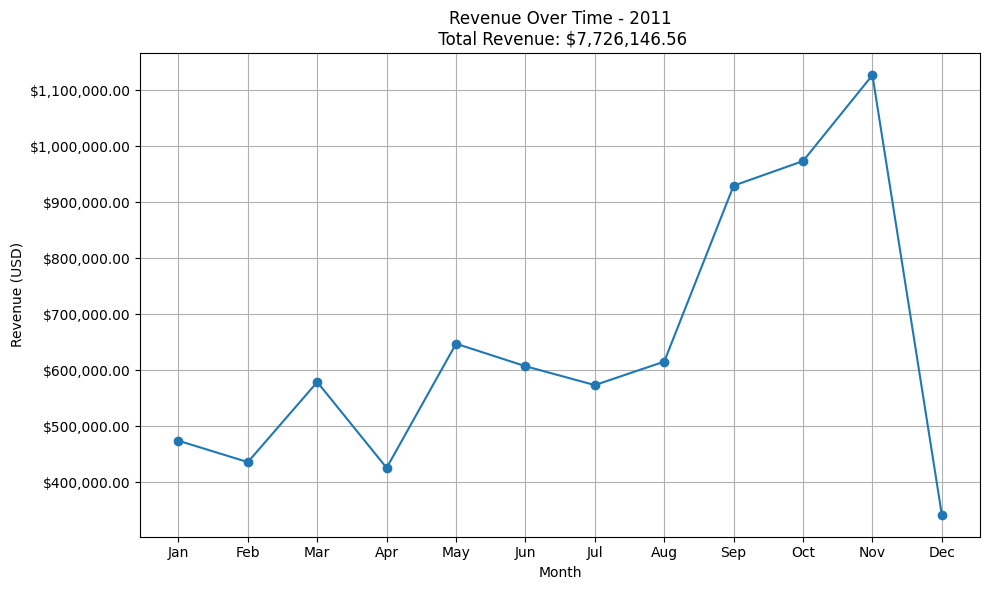

In [55]:
# Get the latet year in the dataset
latest_year = df['InvoiceDate'].dt.year.max()

# Filter data for the latest year and make sure its a copy
latest_year_df = df.loc[df["InvoiceDate"].dt.year == latest_year].copy()

# Make a new column for the total purchases of each customer
latest_year_df['TotalPurchase'] = latest_year_df['UnitPrice'] * latest_year_df['Quantity']

# Sum up the TotalPurchase column
total_revenue = latest_year_df['TotalPurchase'].sum()
formatted_total_revenue = format(total_revenue, ',.2f')

# Revenue per month
revenue_per_month = latest_year_df.groupby(latest_year_df['InvoiceDate'].dt.month)['TotalPurchase'].sum()

# Custom formatter function for currency formatting
def currency_formatter(x, pos):
    return "${:,.2f}".format(x)

# Plot the revenue per month
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_month.index, revenue_per_month.values, marker='o')
plt.title(f'Revenue Over Time - {latest_year}\n Total Revenue: ${formatted_total_revenue}')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))  # Apply custom formatter to y-axis
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

Lets visualize the revenue over the past couple of years

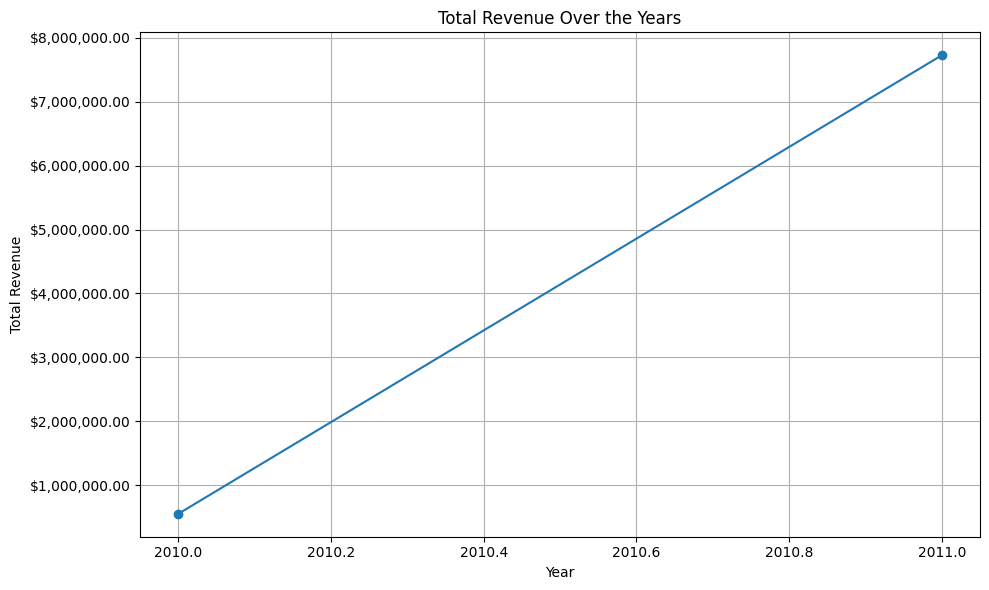

In [56]:
# Calculate the total purchase amount for each transaction
df['TotalPurchase'] = df['UnitPrice'] * df['Quantity']

# Group data by year and sum the revenue
revenue_per_year = df.groupby(df['InvoiceDate'].dt.year)['TotalPurchase'].sum()

# Plot the revenue per year
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_year.index, revenue_per_year.values, marker='o')
plt.title('Total Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

As you can see, the revenue has been on a steady increase for the first year its been in business, with the highest selling month being november